# Act Report

In [1]:
import sqlite3
from sqlite3 import Error
import pandas as pd

def create_connection(db_file):
    """ create a database connection to the SQLite database
        specified by db_file
    :param db_file: database file
    :return: Connection object or None
    """
    conn = None
    try:
        conn = sqlite3.connect(db_file)
        return conn
    except Error as e:
        print(e)

    return conn

In [2]:
database = "../data/master.db"
conn = create_connection(database)

## Distribution of Dog Breeds

,prediction_count
dog_breed,
Golden Retriever,139
Labrador Retriever,95
Pembroke,88
Chihuahua,79
Pug,54
Chow,41
Samoyed,40
Toy Poodle,38
Pomeranian,38


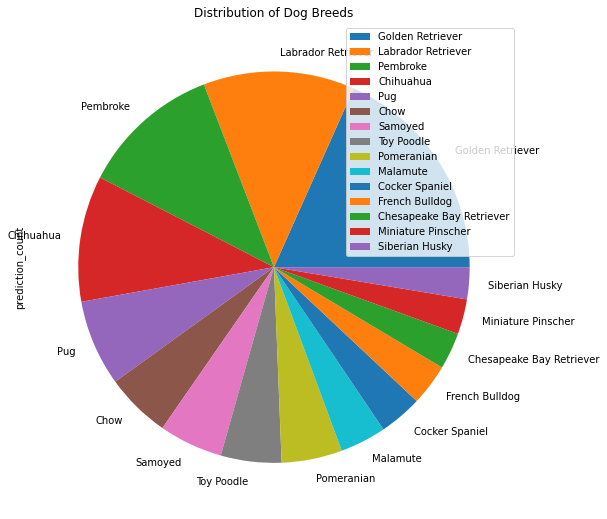

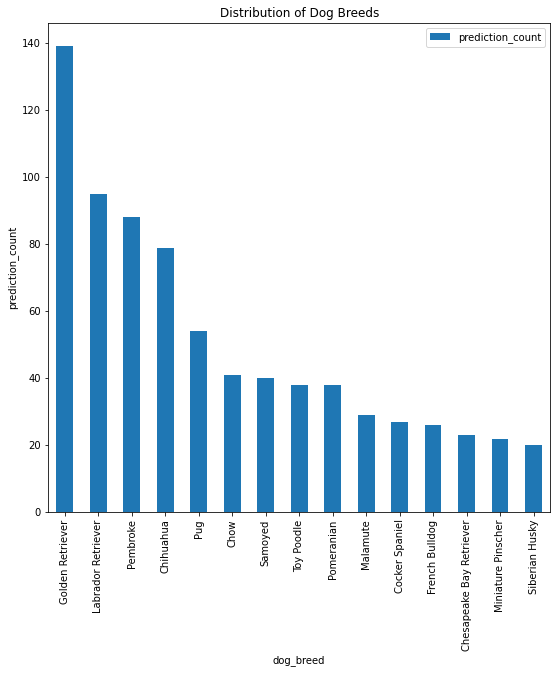

In [3]:
sqlite_select_query = """SELECT prediction AS dog_breed, COUNT(prediction) AS prediction_count 
                         from df_twt_archive_master WHERE breed_predicted == True 
                         GROUP BY prediction ORDER BY prediction_count DESC LIMIT 15"""

df = pd.read_sql_query(sqlite_select_query, conn)
df = df.set_index('dog_breed')
df.plot(kind = 'pie', y='prediction_count', title='Distribution of Dog Breeds',figsize=(9,9))
df.plot(kind = 'bar', y='prediction_count', title='Distribution of Dog Breeds', ylabel='prediction_count',figsize=(9,9))
df

There is a peak in number for golden retrievers. This number progressively goes down across the top 15 breeds.

## Top dog breeds by average favourite count

,avg_favorite_count
dog_breed,
Saluki,21329.000000
French Bulldog,16756.360000
Afghan Hound,15084.666667
Black-And-Tan Coonhound,15019.000000
Flat-Coated Retriever,14882.500000
Irish Water Spaniel,14325.000000
Standard Poodle,13974.285714
English Springer,13795.222222
Cardigan,13388.235294


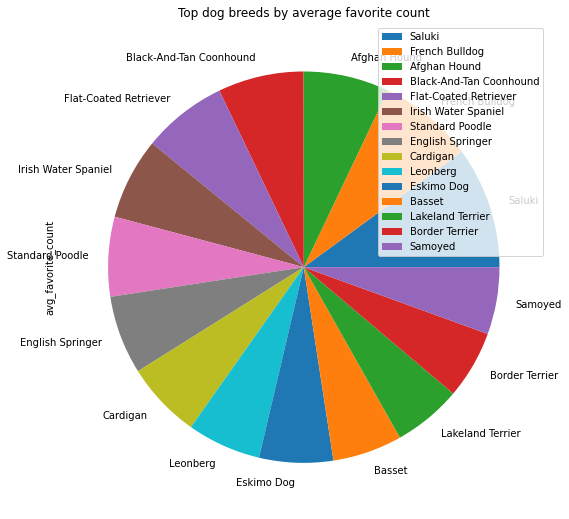

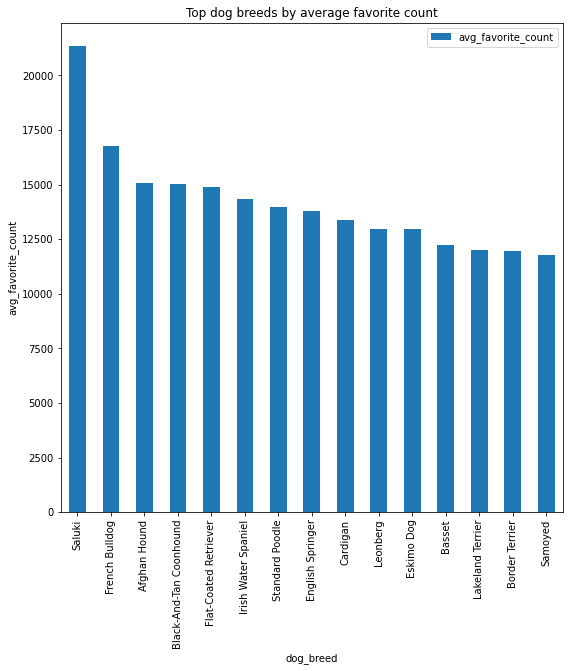

In [4]:
sqlite_select_query = """SELECT prediction AS dog_breed, avg(favorite_count) AS avg_favorite_count 
                         from df_twt_archive_master WHERE breed_predicted == True 
                         GROUP BY prediction ORDER BY avg_favorite_count DESC LIMIT 15"""

df = pd.read_sql_query(sqlite_select_query, conn)
df = df.set_index('dog_breed')
df.plot(kind = 'pie', y='avg_favorite_count', title='Top dog breeds by average favorite count', figsize=(9,9))
df.plot(kind = 'bar', y='avg_favorite_count', title='Top dog breeds by average favorite count', ylabel='avg_favorite_count',figsize=(9,9))
df

There is a peak for the Saluki breed. The distribution looks even across most of the top 15 breeds from African Hound onwards. None of the most common dog breeds are in the top 15 for average favorite count.

## Top dog breeds by average retweet count

,avg_retweet_count
dog_breed,
Standard Poodle,5577.428571
English Springer,5015.555556
Afghan Hound,4928.333333
Eskimo Dog,4550.333333
Saluki,4263.250000
French Bulldog,4047.200000
Great Pyrenees,3877.214286
Flat-Coated Retriever,3827.875000
Lakeland Terrier,3790.000000


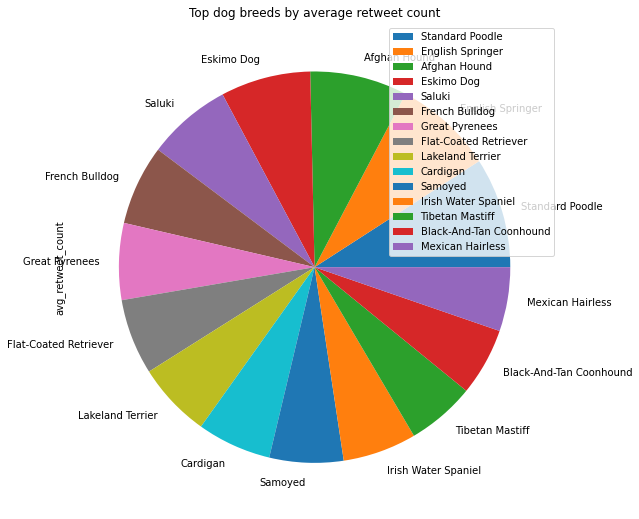

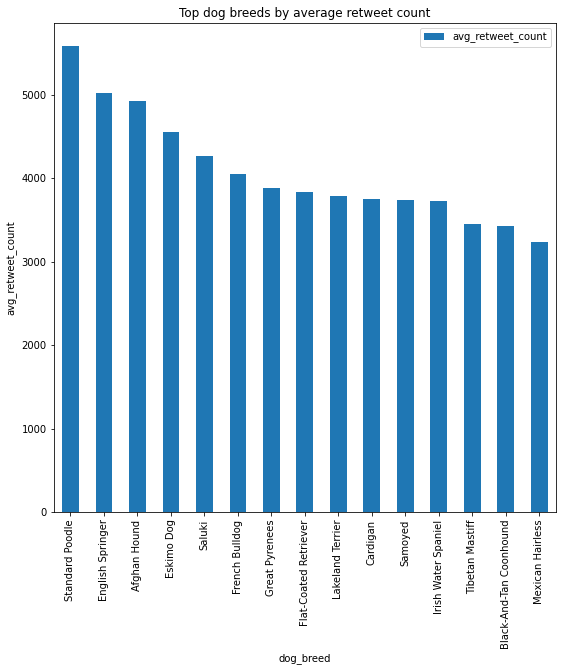

In [5]:
sqlite_select_query = """SELECT prediction AS dog_breed, avg(retweet_count) AS avg_retweet_count 
                         from df_twt_archive_master WHERE breed_predicted == True 
                         GROUP BY prediction ORDER BY avg_retweet_count DESC LIMIT 15"""

df = pd.read_sql_query(sqlite_select_query, conn)
df = df.set_index('dog_breed')
df.plot(kind = 'pie', y='avg_retweet_count', title='Top dog breeds by average retweet count', figsize=(9,9))
df.plot(kind = 'bar', y='avg_retweet_count', title='Top dog breeds by average retweet count', ylabel='avg_retweet_count',figsize=(9,9))
df

Great Pyrenees is the only breed that appears in the top 15 average retweet count but not in the top 15 average favorite count.

## Top dog breeds by average rating

,avg_rating_numerator,avg_favorite_count,avg_retweet_count
dog_breed,,,
Clumber,27.000000,6364.000000,1536.000000
Soft-Coated Wheaten Terrier,25.454545,1968.727273,670.818182
West Highland White Terrier,15.642857,5735.142857,1293.857143
Great Pyrenees,14.928571,11196.428571,3877.214286
Borzoi,14.444444,5431.777778,1611.111111
Labrador Retriever,13.905263,10158.054348,3147.380435
Siberian Husky,13.250000,6132.400000,1416.300000
Golden Retriever,13.208633,10892.618705,3034.705036
Pomeranian,12.868421,7142.289474,2366.894737


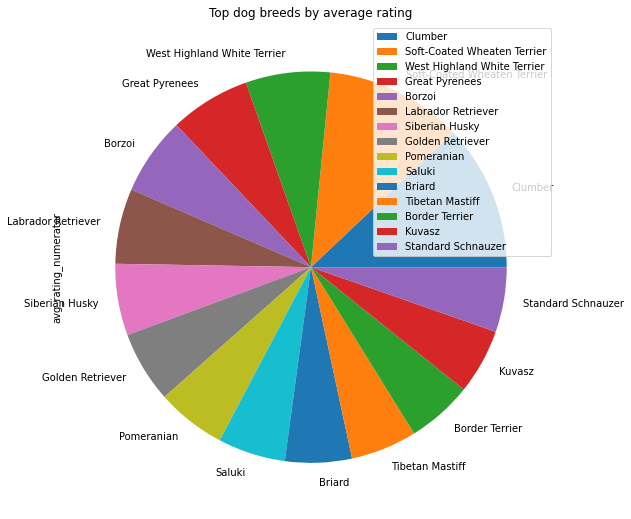

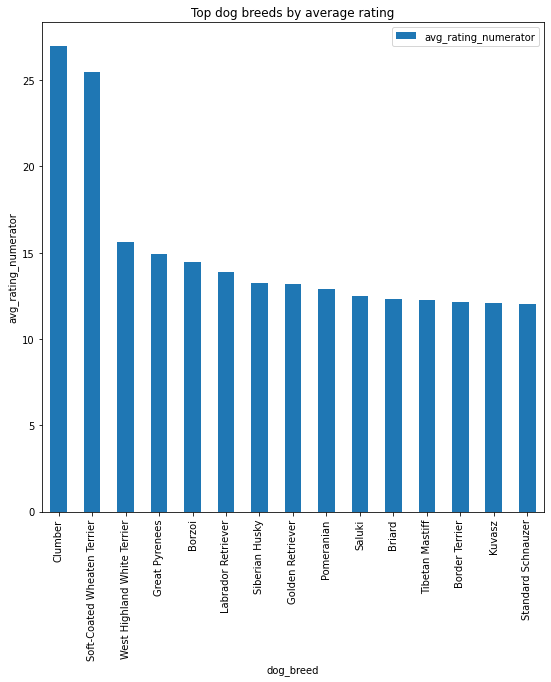

In [6]:
sqlite_select_query = """SELECT prediction AS dog_breed, avg(rating_numerator) AS avg_rating_numerator, avg(favorite_count) AS avg_favorite_count, avg(retweet_count) AS avg_retweet_count
                         from df_twt_archive_master WHERE breed_predicted == True 
                         GROUP BY prediction ORDER BY avg_rating_numerator DESC LIMIT 15"""

df = pd.read_sql_query(sqlite_select_query, conn)
df = df.set_index('dog_breed')
df.plot(kind = 'pie', y='avg_rating_numerator', title='Top dog breeds by average rating', figsize=(9,9))
df.plot(kind = 'bar', y='avg_rating_numerator', title='Top dog breeds by average rating', ylabel='avg_rating_numerator',figsize=(9,9))
df

## Total retweets and favourites over time

,sum_retweet_count,sum_favorite_count
date,,
2015-11-15,518.0,2549.0
2015-11-16,1470.0,3273.0
2015-11-17,1448.0,3430.0
2015-11-18,1049.0,2765.0
2015-11-19,25450.0,67730.0
...,...,...
2017-07-27,3724.0,25124.0
2017-07-28,17982.0,68880.0
2017-07-29,10664.0,54451.0


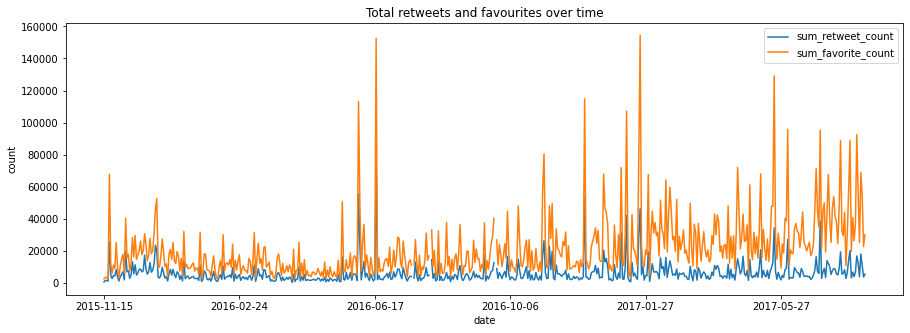

In [7]:
import pandas as pd
sqlite_select_query = """SELECT date, SUM(retweet_count) AS sum_retweet_count, SUM(favorite_count) AS sum_favorite_count
                         from df_twt_archive_master WHERE breed_predicted == True 
                         GROUP BY date ORDER BY date ASC"""

df = pd.read_sql_query(sqlite_select_query, conn)
df = df.set_index('date')
df.plot(kind = 'line', y=['sum_retweet_count', 'sum_favorite_count'], title='Total retweets and favourites over time', ylabel='count',figsize=(15,5))
df

There are noticeable peaks in favorite count in 2016-06-17, 2017-01-27 and 2017-05-27. Favorite count rises across the years, whereas retweet count raises more gradually with fewer peaks.